In [1]:
# Importing the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [256]:
# Loading the dataset

data = pd.read_csv(r"C:\Users\Shashi\Model Building\Neural Network\50_Startups (2).csv")

In [257]:
# Checking the head of data

data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [258]:
# Checking the duplicates

data.duplicated().sum()

0

In [259]:
# Checking the Value count

data['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [260]:
# Checking the Missing Values

data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [261]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

data['State'] = enc.fit_transform(data['State'])

In [262]:
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,0,156122.51
7,130298.13,145530.06,323876.68,1,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,0,149759.96


In [263]:
# Splitting the data

X = data.drop('Profit', axis = 1)
Y = data.Profit

In [264]:
# Importing the Train Test Split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [265]:
# Feature Scaling

from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

In [266]:
X.shape

(50, 4)

In [267]:
Y.shape

(50,)

In [268]:
len(X.columns)

4

In [280]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 4, kernel_initializer = 'he_uniform',activation='relu',input_dim = 4))

# Adding the second hidden layer
classifier.add(Dense(units = 2, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(x_train, y_train,validation_split=0.33, batch_size = 10, epochs = 10)

Epoch 1/10
3/3 [==============================] - 1s 123ms/step - loss: -43742.5977 - accuracy: 0.0000e+00 - val_loss: -34389.5547 - val_accuracy: 0.0000e+00
Epoch 2/10
3/3 [==============================] - 0s 34ms/step - loss: -45695.0234 - accuracy: 0.0000e+00 - val_loss: -36042.3945 - val_accuracy: 0.0000e+00
Epoch 3/10
3/3 [==============================] - 0s 34ms/step - loss: -47567.8750 - accuracy: 0.0000e+00 - val_loss: -37692.5000 - val_accuracy: 0.0000e+00
Epoch 4/10
3/3 [==============================] - 0s 33ms/step - loss: -49400.4961 - accuracy: 0.0000e+00 - val_loss: -39338.9141 - val_accuracy: 0.0000e+00
Epoch 5/10
3/3 [==============================] - 0s 34ms/step - loss: -51171.5586 - accuracy: 0.0000e+00 - val_loss: -41117.8555 - val_accuracy: 0.0000e+00
Epoch 6/10
3/3 [==============================] - 0s 34ms/step - loss: -53051.3477 - accuracy: 0.0000e+00 - val_loss: -42904.1523 - val_accuracy: 0.0000e+00
Epoch 7/10
3/3 [==============================] - 0s 33ms

In [270]:
# List all data in history
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


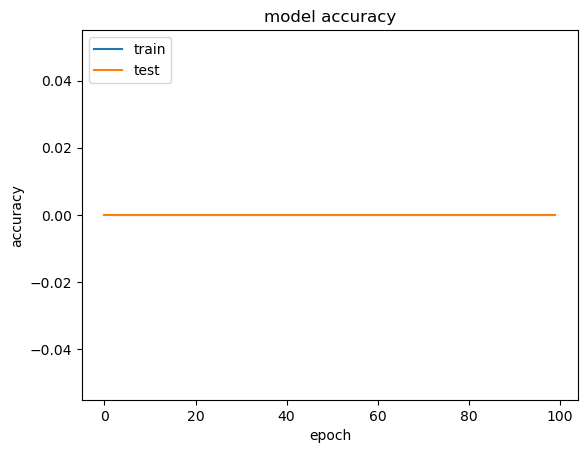

In [271]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

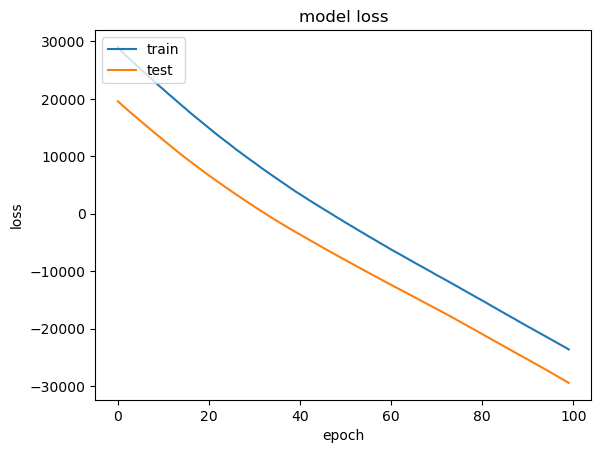

In [272]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show(block=True)

In [275]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)
y_test = (y_test > 0.5).astype(int)

1/1 [==============================] - 0s 17ms/step


In [276]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[0, 0],
       [1, 9]], dtype=int64)

In [277]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [278]:
score

0.9